Model 1 Accuracy: 0.77
Model 2 Accuracy: 0.80

Enter the following details:
Passenger ID: 101
Pclass (1, 2, or 3): 3
Sex (male or female): female
Age: 23
Number of siblings/spouses aboard: 1
Number of parents/children aboard: 1
Fare: 45
Embarked (C, Q, S): c

Model 1 Prediction: Not Survived
Model 2 Prediction: Not Survived


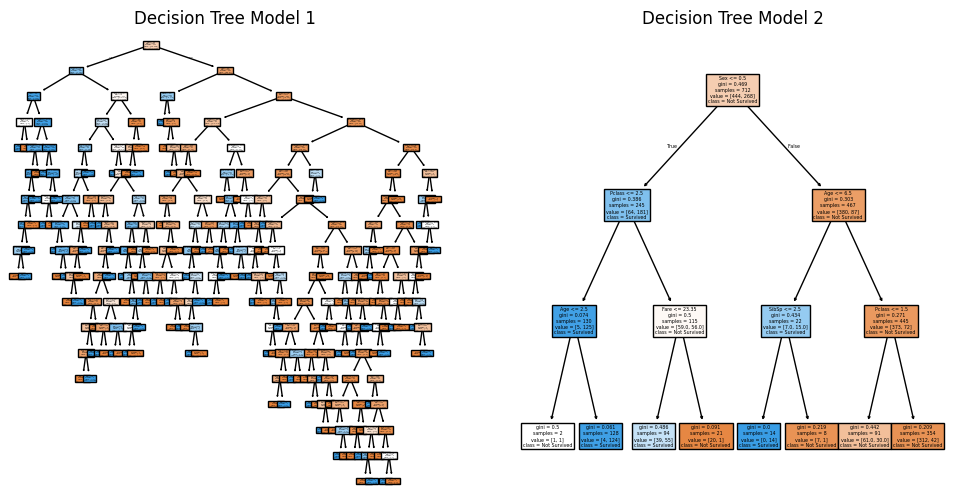

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

# Load datasets
train_df = pd.read_csv('train.csv')

# Preprocess the data
def preprocess_data(df):
    df = df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')  # Drop unnecessary columns
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = df['Embarked'].fillna('S')  # Fill missing values for 'Embarked'
    df['Embarked'] = le.fit_transform(df['Embarked'])
    imputer = SimpleImputer(strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Fare'] = imputer.fit_transform(df[['Fare']])
    return df

train_df = preprocess_data(train_df)

# Define features and target for training data
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Decision Tree with default parameters
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

# Model 2: Decision Tree with max_depth = 3
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
model2.fit(X_train, y_train)

# Evaluate models
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

print(f'Model 1 Accuracy: {accuracy1:.2f}')
print(f'Model 2 Accuracy: {accuracy2:.2f}')

# Function to take user input
def get_user_input():
    print("\nEnter the following details:")
    PassengerId = int(input("Passenger ID: "))
    Pclass = int(input("Pclass (1, 2, or 3): "))
    Sex = input("Sex (male or female): ").strip().lower()
    Age = float(input("Age: "))
    SibSp = int(input("Number of siblings/spouses aboard: "))
    Parch = int(input("Number of parents/children aboard: "))
    Fare = float(input("Fare: "))
    Embarked = input("Embarked (C, Q, S): ").strip().upper()

    # Create DataFrame for user input
    user_data = pd.DataFrame({
        'PassengerId': [PassengerId],
        'Pclass': [Pclass],
        'Sex': [1 if Sex == 'male' else 0],  # Convert male/female to 1/0
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [0 if Embarked == 'C' else 1 if Embarked == 'Q' else 2]  # Encode Embarked
    })
    return user_data

# Get user input
user_input_df = get_user_input()

# Match training format by aligning columns
user_input_df = user_input_df[X_train.columns]

# Predict using both models
user_prediction1 = model1.predict(user_input_df)
user_prediction2 = model2.predict(user_input_df)

# Display predictions
print(f"\nModel 1 Prediction: {'Survived' if user_prediction1[0] == 1 else 'Not Survived'}")
print(f"Model 2 Prediction: {'Survived' if user_prediction2[0] == 1 else 'Not Survived'}")

# Visualize the decision trees
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
tree.plot_tree(model1, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree Model 1")
plt.subplot(1, 2, 2)
tree.plot_tree(model2, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree Model 2")
plt.show()
